# OUMAZIZ Thiziri


# Practical work 4: Frequency filtering, color

In [204]:
import numpy as np
from numpy.fft import fft2,ifft2,fftshift,ifftshift 
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib notebook

def imshow(I,title=None,size=500):
    """ display an image with a specific size """
    plt.figure(figsize=(size//80,size//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()


## Exercise 1 - Frequency filtering

1. Compute than display the centered module of Fourier transform of `img/mandrill.png` (use functions seen in previous lessons). 

<IPython.core.display.Javascript object>


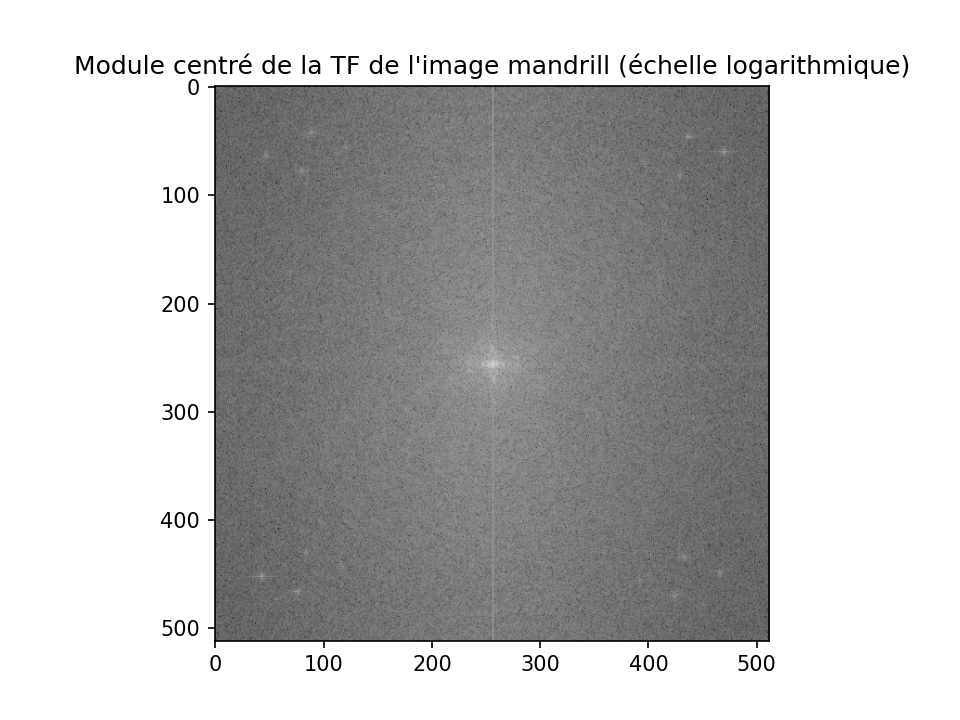

In [205]:
mandrill = np.array(Image.open("img/mandrill.png"))

TF  = fft2(mandrill) #Calcul de la Transformée de Fourier 
log_module = np.log(1 + np.abs(TF)) #on utilise le log pour une meilleure visualisation 
centered_module = fftshift(log_module) 

plt.figure()
plt.imshow(centered_module)
plt.title("Module centré de la TF de l'image mandrill (échelle logarithmique)")
plt.show()

2. Write a function `idealLowPassFilter(n,m,fc)` returning an ideal low pass filter with frequency cutoff $f_c$ and size $n\times m$. Recall: this function set to 1 pixels at Euclidian distance $f_c$ from the center (null frequency).

<IPython.core.display.Javascript object>


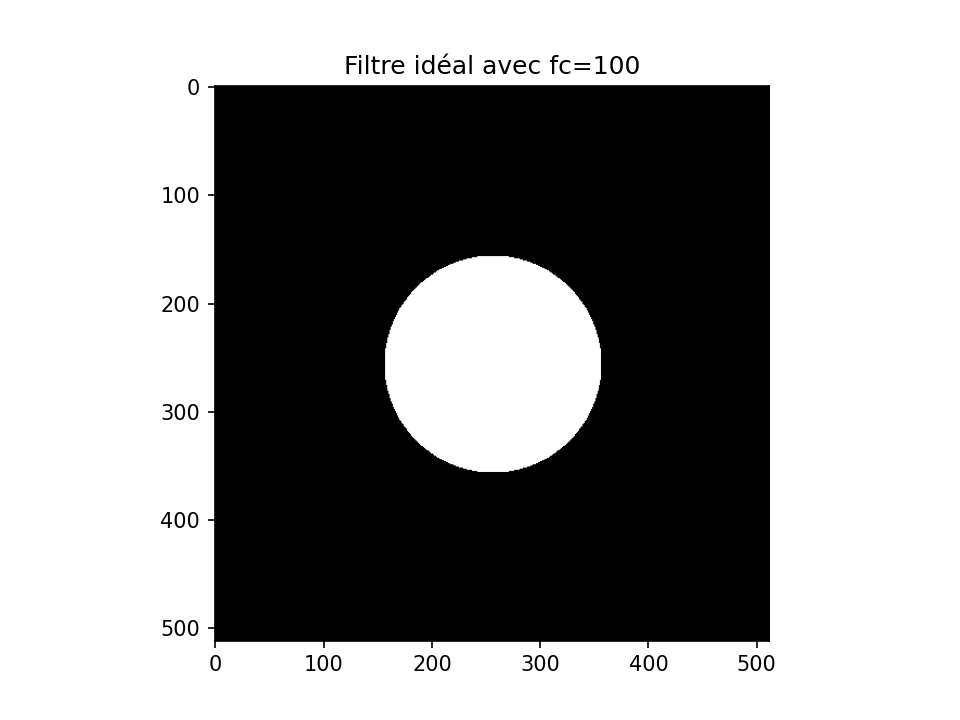

In [206]:
def idealLowPassFilter(n,m,fc):
    filtre = np.zeros((n, m))

    for u in range(n):
        for v in range(m):
            if np.sqrt((u-m/2)**2 + (v-n/2)**2) < fc: #distance euclidienne 
                filtre[u,v] = 1
    
    return filtre

filtre_ideal = idealLowPassFilter(centered_module.shape[0], centered_module.shape[1], 100) 

plt.figure()
plt.imshow(filtre_ideal)
plt.title("Filtre idéal avec fc=100")
plt.show()

3. Write a function `lowPass(I,fc)` performing a low pass filtering of an image $I$. The function should
 - compute the centered Fourier transform of $I$
 - multiply point-by-point the spectrum with the ideal low filter produced by `idealLowPassFilter()`
 - uncenter the filtered spectrum and apply the inverse Fourier transform (use function `ifft2()` from module `numpy.fft`)
 - return the real part of filtered image

In [207]:
def lowPass(I,fc):
    centered_FT = fftshift(fft2(I)) #TF centrée
    n = centered_FT.shape[0]
    m = centered_FT.shape[1]
    filtre_ideal = idealLowPassFilter(n,m,fc) #création du filtre idéal
    filtered = filtre_ideal * centered_FT #Multiplication entre le spectre et le filtre passe bas
    uncentered = ifftshift(filtered) #décentrage du spectre filtré
    filtered_image = ifft2(uncentered).real #On prend la partie réelle de la TF inverse 
    return filtered_image

4. Experiment this function on `img/mandrill.png` and `img/lena.jpg` with various values of cut off $f_c$.
 - give two effects that appears when $f_c$ decreases,
 - propose two applications of this filtering.


<IPython.core.display.Javascript object>


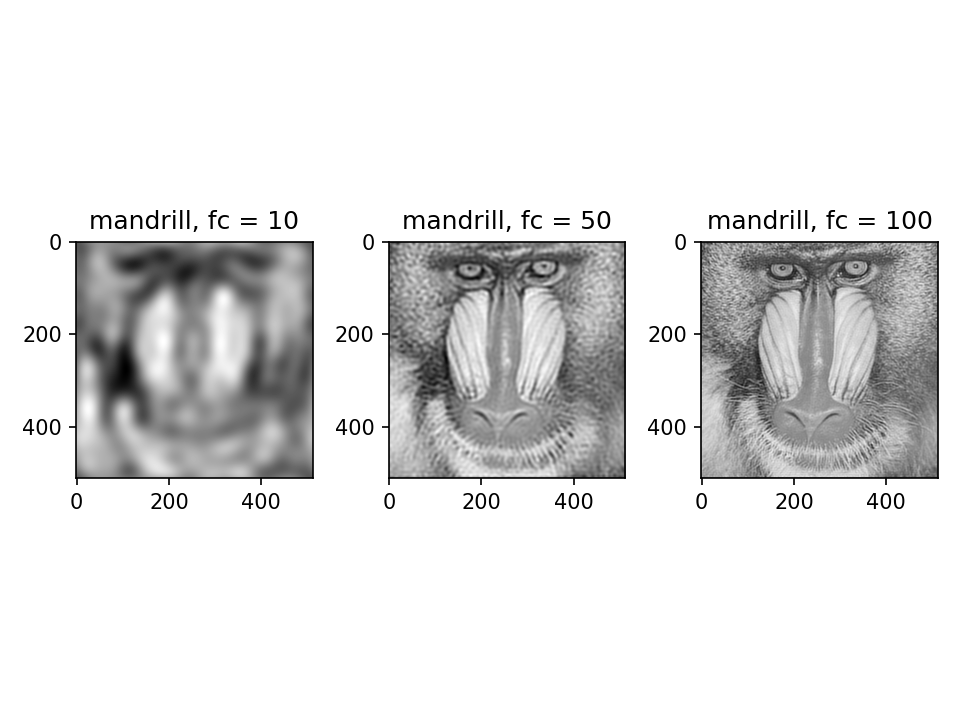

<IPython.core.display.Javascript object>


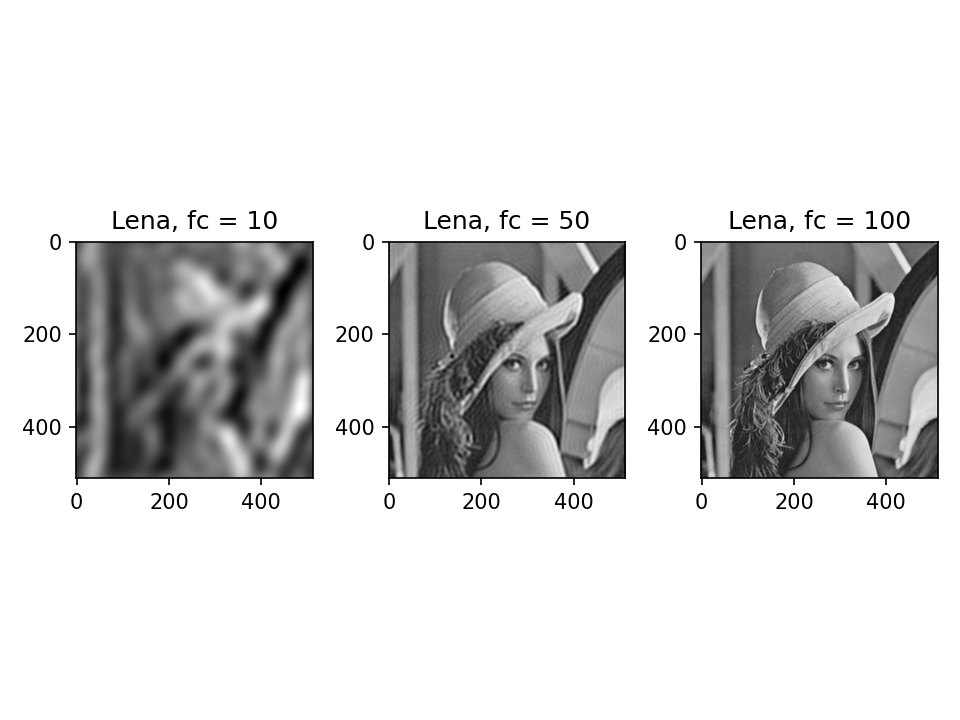

In [208]:
lena=np.array(Image.open("img/lena.jpg"))

fc = [10, 50, 100]

plt.figure()

for i in range (3) :
    plt.subplot(1,3,i+1)
    plt.imshow(lowPass(mandrill, fc[i]))
    plt.title(f"mandrill, fc = {fc[i]}")

plt.tight_layout()
plt.show()

plt.figure()
for i in range (3) :
    plt.subplot(1,3,i+1)
    plt.imshow(lowPass(lena, fc[i]))
    plt.title(f"Lena, fc = {fc[i]}")
    

plt.tight_layout()
plt.show()

02 effets lorsque fc diminue :

* Réduction de la netteté : en diminuant fc, le filtre passe-bas permet de laisser passer des fréquences plus basses et d'atténuer les hautes fréquences. Cela a pour effet de réduire la netteté de l'image, car les détails fins et les contours sont moins bien préservés. L'image est de plus en plus lissée.

* Réduction du bruit haute fréquence : dans le cas d'une image bruitée, en réduisant fc, le filtre passe-bas peut contribuer à réduire le bruit et les imperfections indésirables dans l'image, ce qui peut améliorer la qualité de l'image. (image lissée)

02 applications du filtre passe bas : 

* Réduction du bruit d'image : en appliquant un filtre passe-bas, on peut réduire le bruit haute fréquence dans une image, améliorant ainsi sa clarté et sa qualité.

* Filtre anti aliasing : en utilisant un filtre passe-bas, on peut supprimer les composantes haute fréquence de l'image, réduisant ainsi le risque d'aliasing lors de la réduction de la résolution. Cela permet d'obtenir des images de qualité supérieure lorsqu'elles sont échantillonnées ou redimensionnées, en évitant les artefacts indésirables.

## Exercise 2 -  Linear filtering (convolution)

1. Given a kernel convolution of size $d\times d$, $d$ being odd. How many lines and columns should be added to each side of the image to apply this filter? The image is supposed surrounded by zero values.

On doit ajouter $\frac{𝑑 - 1}{2}$ lignes et colonnes à chaque côté de l'image. Cela permet de garantir que le noyau puisse être correctement appliqué à tous les pixels de l'image, y compris ceux situés sur les bords.

2. Write a function `imagePad(I,h)` getting an image and a kernel, returning a new image padded with zeros according to question 1. It is not allowed to use a module implementing the padding.

<IPython.core.display.Javascript object>


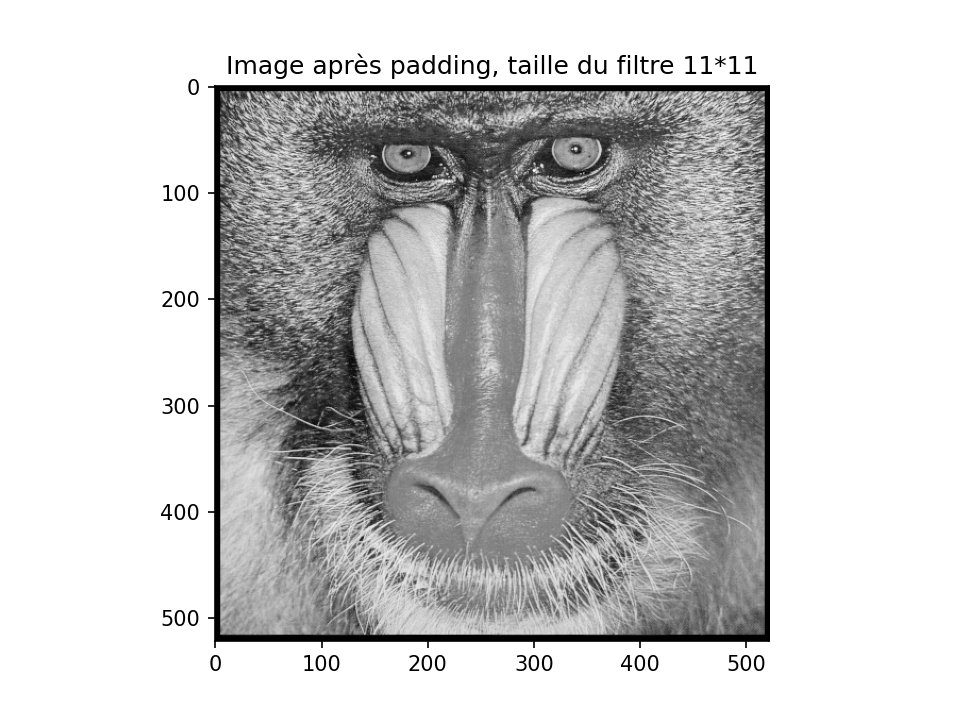

In [209]:
def imagePad(I,h):
    d = h.shape[0]
    m = int(np.floor(d/2)) 
    padded = np.zeros((I.shape[0] + 2*m, I.shape[1] + 2*m))
    padded[m:(padded.shape[0]-m), m: (padded.shape[1]-m)] = I
    return padded

kernel = np.ones((11,11))

plt.figure()
plt.imshow(imagePad(mandrill, kernel))
plt.title("Image après padding, taille du filtre 11*11")
plt.show()


3. Write a function `conv2(I,h)` getting an image and a kernel and returning the convolution of $I$ by $h$. The function should return an image having the same shape than $I$. It is not allowed to use a module implementing the convolution.

In [137]:
def conv2(I,h):
    filtered = np.zeros((I.shape[0], I.shape[1]))
    padded = imagePad(I,h)
    m = int(np.floor(h.shape[0]/2))
    d = h.shape[0]
    h_symetrique = np.fliplr(np.flipud(h)) #on utilise le symétrique du filtre

    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            filtered[i,j] = np.sum(padded[i:i+d, j:j+d]*h_symetrique) #on fait la multiplication directe avec h_symetrique
    
    return filtered  

4. Try this function on mean filter of size $3\times3$, $5\times 5$ and $7\times 7$. Discuss the results.

<IPython.core.display.Javascript object>


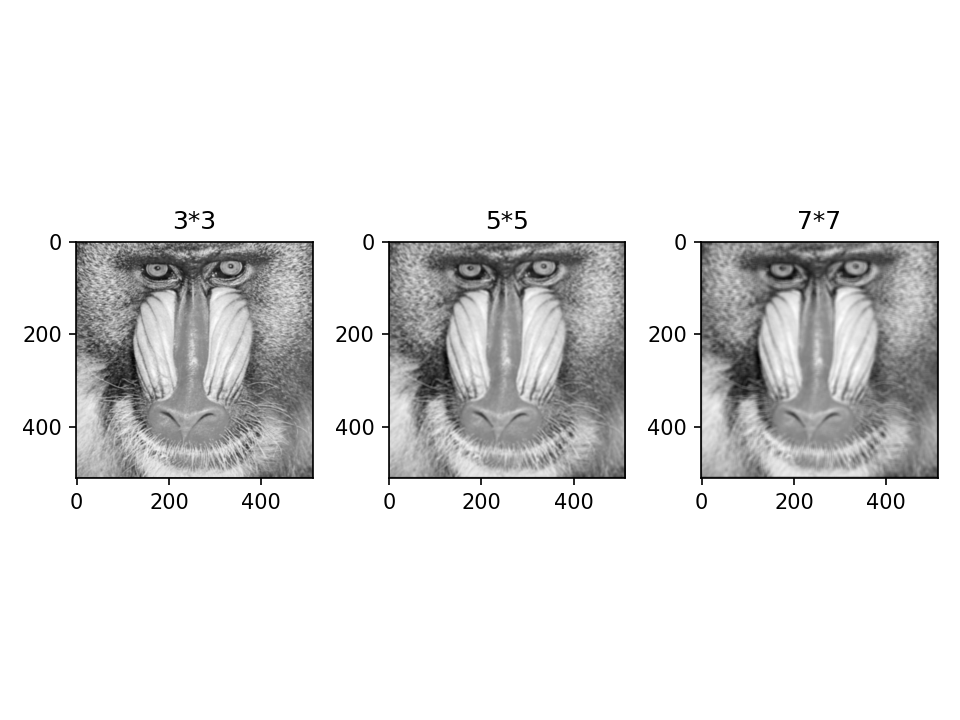

In [192]:
def create_mean_kernel(d): #fonction pour créer un filtre moyenneur de taille d*d
    return np.ones((d,d))/(d**2)

d = [3,5,7]

plt.figure()

for i in range (3) :

    img = conv2(mandrill, create_mean_kernel(d[i]))

    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.title(f'{d[i]}*{d[i]}')

plt.tight_layout()
plt.show()

Le fitre moyenneur est un filtre passe bas qui laisse passer les basses fréquences et atténuent les hautes fréquences, ainsi il lisse l'image. La taille du filtre moyenneur affecte le niveau de lissage de l'image et la conservation des détails, plus les dimensions du filtre sont grandes, plus le lissage est fort. Pour 3x3 l'image est légèrement lissée, pour 7x7, elle l'est fortement. 


5. Display the transfert function of these mean filters. For a better visualization, use the zero-padding technique to obtain a filter with a large size (for instance $256\times 256$). Use `imshow()` and `toVisualizeLogFT()`.

<IPython.core.display.Javascript object>


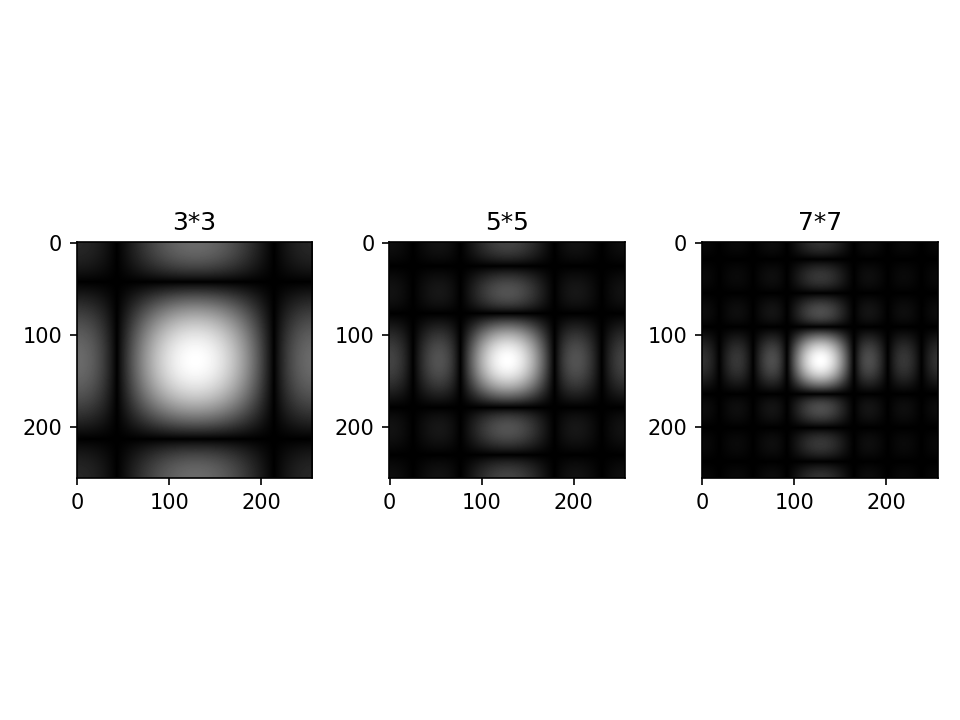

<IPython.core.display.Javascript object>


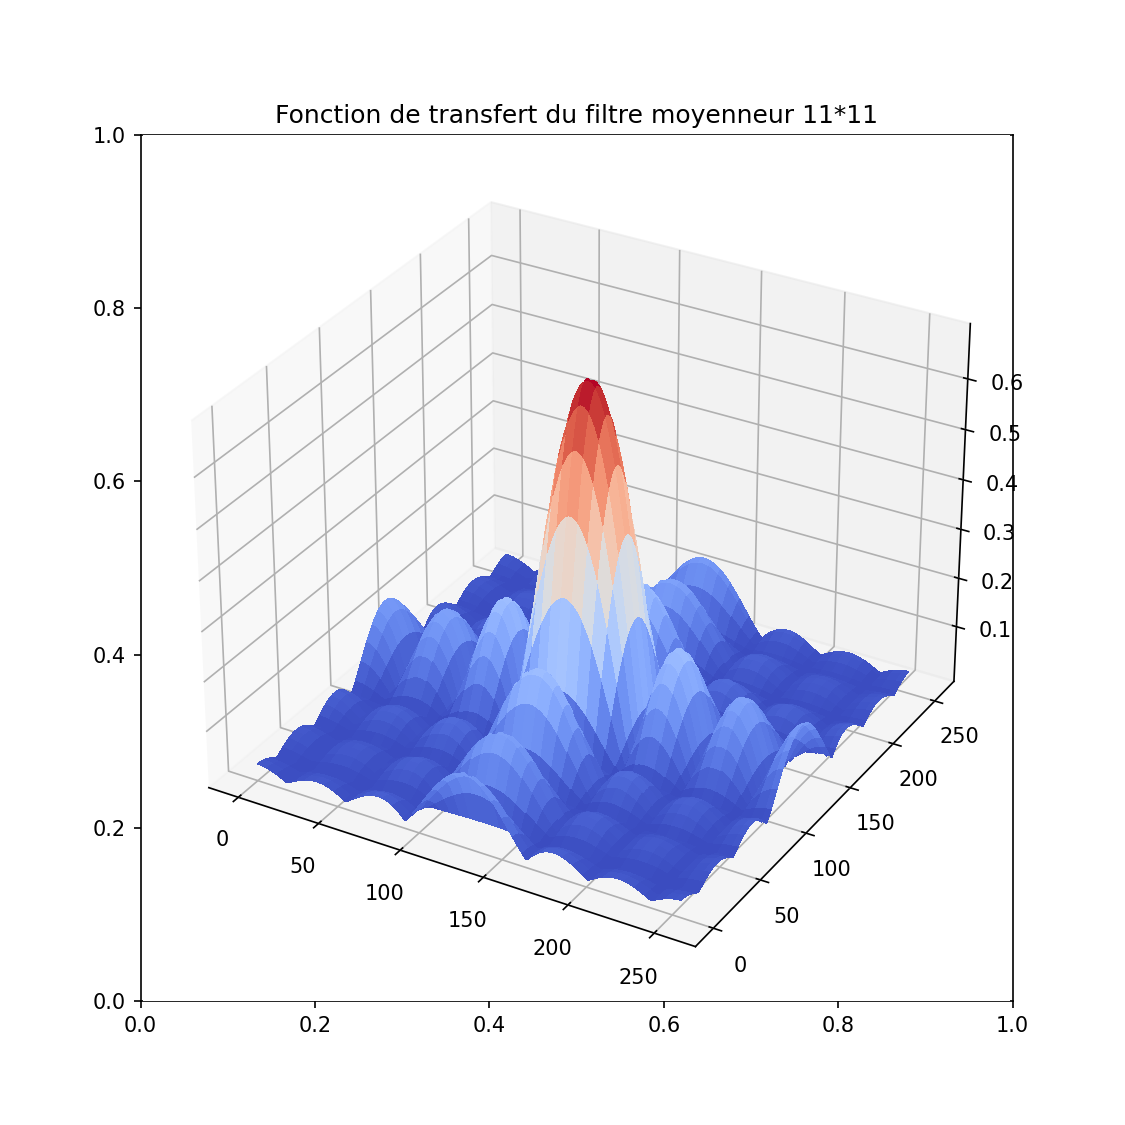

In [193]:
from matplotlib import cm
def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

d = [3,5,7]

plt.figure()

for i in range (3) :
    noyeau = np.zeros((256,256))
    kernel = create_mean_kernel(d[i])
    m = int(d[i]/2)
    noyeau[int(256/2) - m - 1: (int(256/2) + m), int(256/2) - m - 1: (int(256/2) + m)] = kernel

    log_mod = np.log(1+np.abs(fft2(noyeau)))

    Mod = fftshift(log_mod)
    plt.subplot(1,3,i+1)
    plt.imshow(Mod)
    plt.title(f"{d[i]}*{d[i]}")

plt.tight_layout()
plt.show()

surf(Mod,"Fonction de transfert du filtre moyenneur 11*11") #Affichage 3D

6. Interpretation: what is the analytic expression of the transfert function of a mean filter? Is  it an ideal low pass filter?

Le filtre moyenneur 2D n'est pas un filtre idéal car il ne présente pas une coupure nette comme un vrai filtre passe-bas idéal.  En pratique, il atténue progressivement les composantes haute fréquence au lieu de le faire de manière abrupte.

7. Bonus question: perform the same study for the Gaussian kernel. Determine $\sigma$ in order to have filter of size $3\times3$, $5\times5$, and $7\times7$.

array([0.33333333, 0.66666667, 1.        ])

<IPython.core.display.Javascript object>


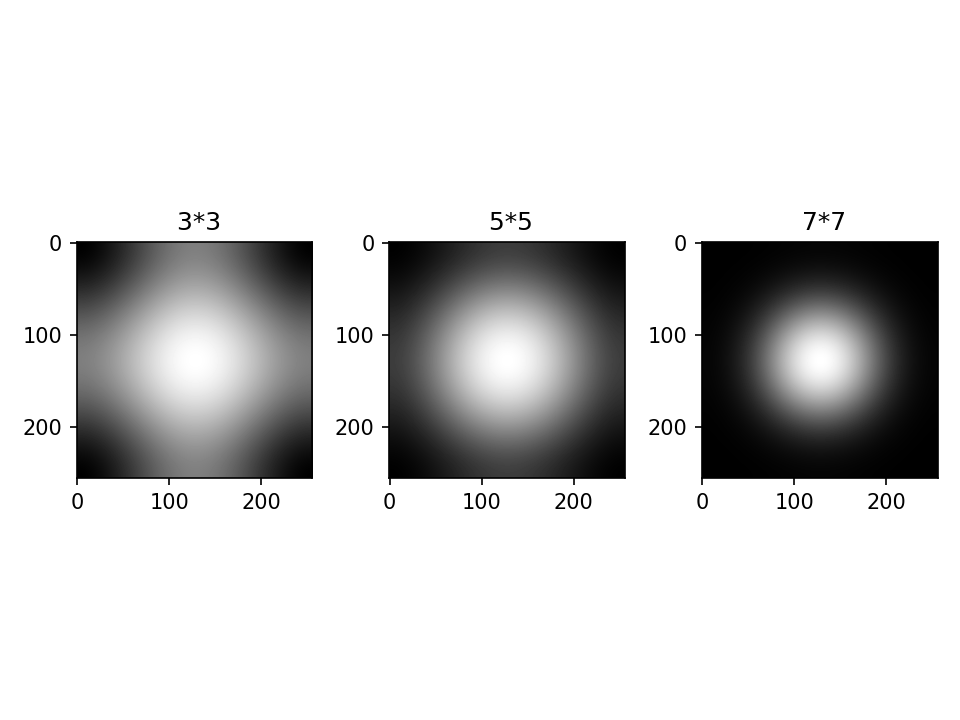

<IPython.core.display.Javascript object>


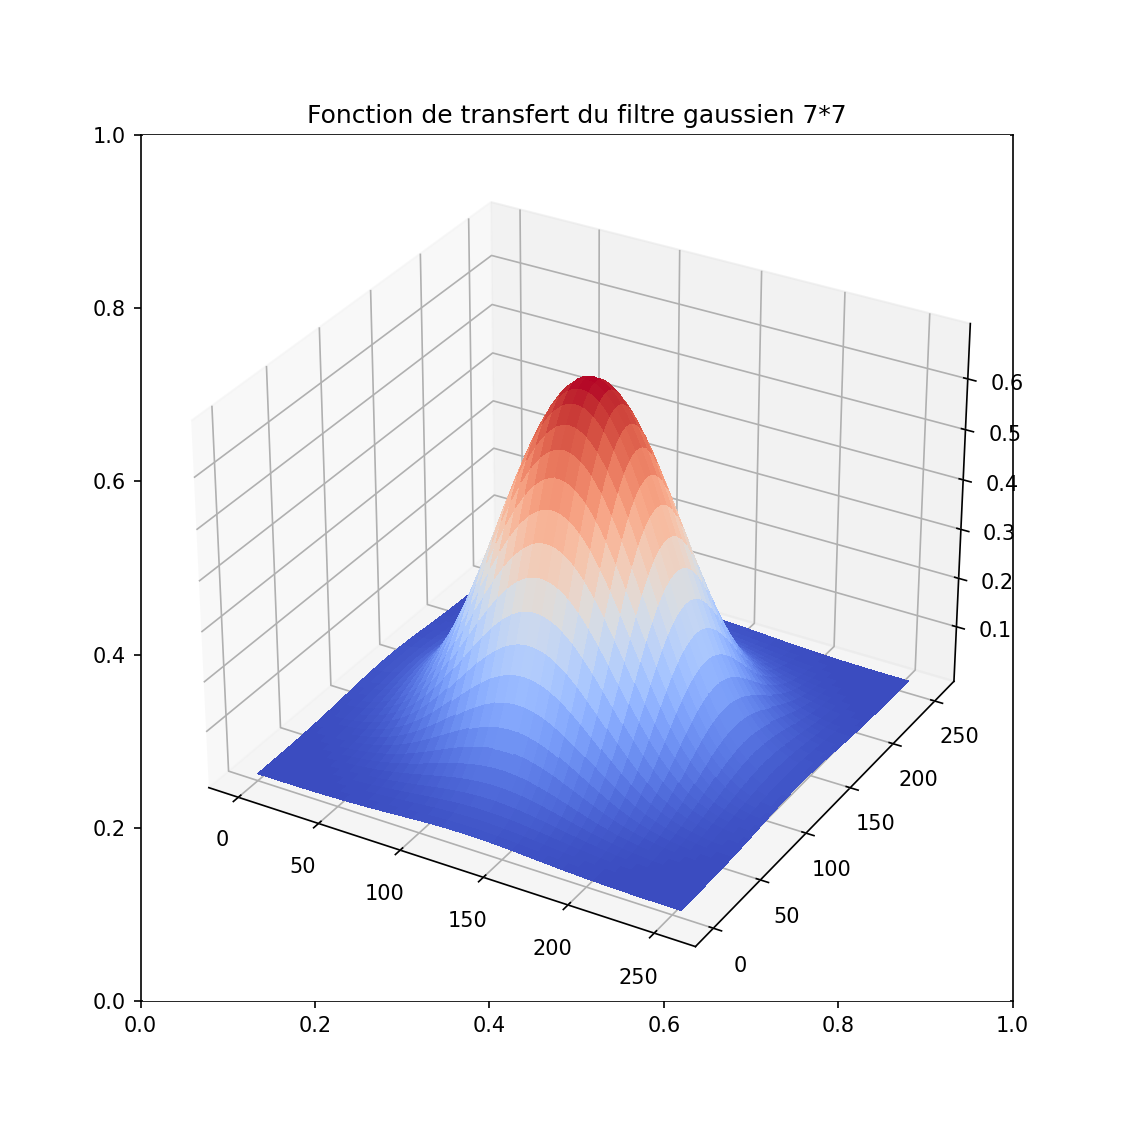

In [194]:
def gaussianKernel(sigma):
    """ double -> Array
        return a gaussian kernel of standard deviation sigma
    """
    n2 = int(np.ceil(3*sigma))
    x,y = np.meshgrid(np.arange(-n2,n2+1),np.arange(-n2,n2+1))
    kern = np.exp(-(x**2+y**2)/(2*sigma*sigma))
    return  kern/kern.sum()
### your answer start below

d = np.array([3, 5, 7])
sigma = (1/3) * ((0.5*(d-1)).astype(int)) 
display(sigma)

plt.figure(d[i])

for i in range(3) :
    padded = np.zeros((256,256))
    noyau = gaussianKernel(sigma[i])
    m = int(d[i]/2)
    padded[int(256/2) - m - 1: (int(256/2) + m), int(256/2) - m - 1: (int(256/2) + m)] = noyau


    log_mod = np.log(1+np.abs(fft2(padded)))

    Mod = fftshift(log_mod)

    
    plt.subplot(1,3,i+1)
    plt.imshow(Mod)
    plt.title(f" {d[i]}*{d[i]}")

plt.tight_layout()
plt.show()

surf(Mod,"Fonction de transfert du filtre gaussien 7*7") #Affichage 3D

## Exercise 3: anti aliasing filtering

1. Give a code that subsamples of factor 2 (use function `subSample2()` given in TME3) the image `img/barbara.png`.

In [149]:
def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

barbara = np.array(Image.open('img/barbara.png'))
subsampled_image = subSample2(barbara)

2. Give a code that subsamples of factor 2 (use function `subSample2()`) the image `img/barbara.png` after applying an low pass filter (use `antiAliasingFilter()`). As comment, recall the principle of filtering in the frequency domain.

Filtrer dans le domaine fréquentiel revient à effectuer le produit entre le spectre de l'image (transformée de Fourier de l'image) et la réponse en fréquence du filtre.

<IPython.core.display.Javascript object>


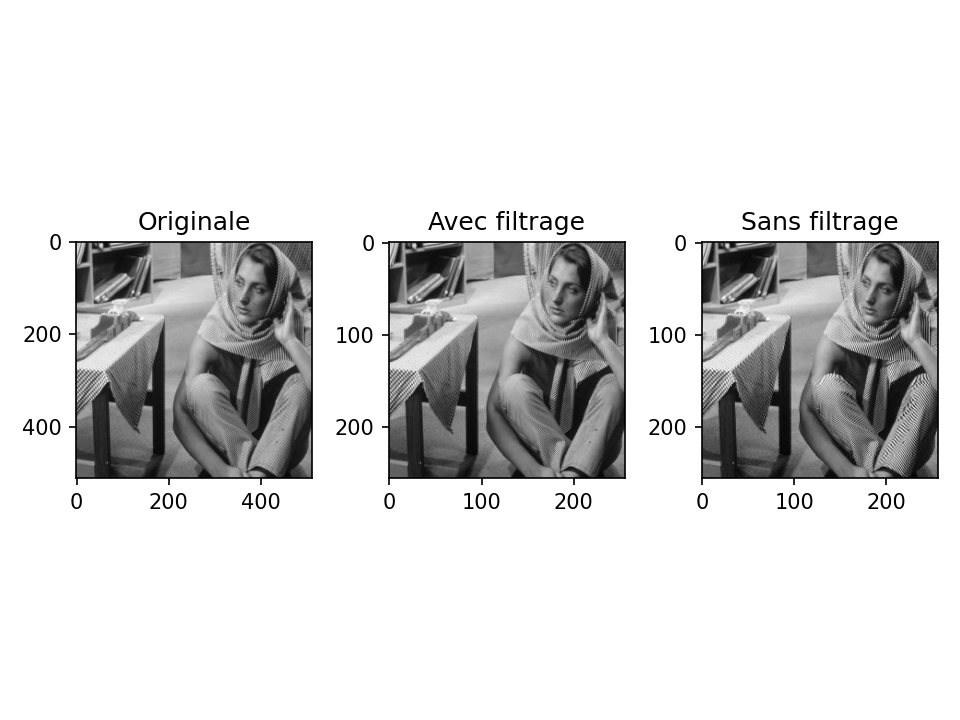

In [196]:
def antiAliasingFilter(n,m):
    """ int*int -> Array """
    n2, m2 = n//2, m//2
    rn, rm = n//4, m//4
    A = np.zeros((n, m))
    A[rn:rn+n2, rm:rm+m2] = 1
    return A

cent_FT = fftshift(fft2(barbara))
filtered = antiAliasingFilter(barbara.shape[0],barbara.shape[1])*cent_FT
uncentered = ifftshift(filtered)
filtered_image = ifft2(uncentered).real
    
plt.figure()
plt.subplot(1,3,1)
plt.imshow(barbara)
plt.title("Originale")
plt.subplot(1,3,2)
plt.imshow(subSample2(filtered_image))
plt.title("Avec filtrage")
plt.subplot(1,3,3)
plt.imshow(subsampled_image)
plt.title("Sans filtrage")

plt.tight_layout()
plt.show()

3. Describe and analyze the filtering of Barbara with and without the anti aliasing filter. What information is lost for the two filtered images ?

* Avec un filtre anti-aliasing : le filtre anti aliasing  est conçu pour réduire ou éliminer les artéfacts d'aliasing qui peuvent survenir lorsqu'on sous echantillonne l'image. Les filtres anti-aliasing fonctionnent en atténuant les composantes à haute fréquence de l'image.

Informations perdues : Les détails à haute fréquence et les motifs fins dans l'image sont atténués ou flous (l'image est lissée), ce qui signifie qu'une partie des détails est perdue. Cette perte est intentionnelle et vise à éviter les artéfacts d'aliasing indésirables. 

* Sans filtre anti-aliasing : on voit l'apparition des artéfacts d'aliasing après échantillonnage.

Informations perdues : sans un filtre anti-aliasing, des artéfacts d'aliasing peuvent survenir, et ces artéfacts peuvent déformer l'image et introduire du bruit à haute fréquence qui n'était pas présent à l'origine. Dans ce cas, des informations peuvent être perdues en raison de ces artéfacts. Cependant, l'image peut contenir plus de détails à haute fréquence qui ne sont pas atténués.

## Exercise 4: color image
1. Read images `img/clown.bmp` and `img/clown_lumi.bmp` as two arrays named $I_1$ and $I_2$. Display these images and examine their shape. What difference there are between them?

<IPython.core.display.Javascript object>


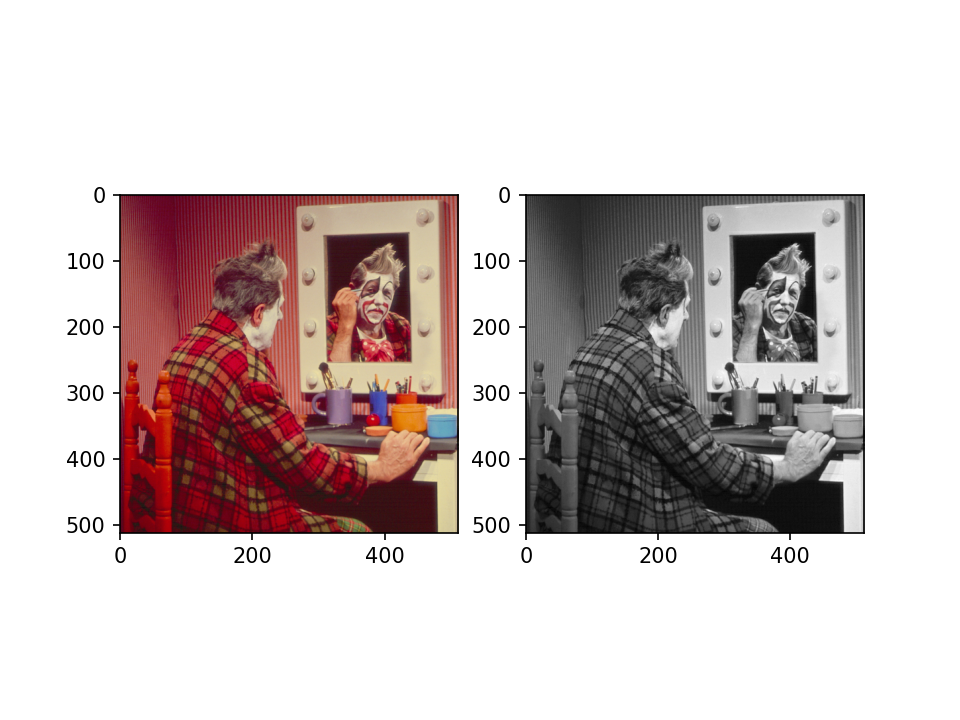

Shape of clown.bmp (512, 512, 3)
Shape of clown_lumi.bmp (512, 512)


In [197]:
I1 = np.array(Image.open("img/clown.bmp"))
I2 = np.array(Image.open("img/clown_lumi.bmp"))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(I1)
plt.show()
plt.subplot(1,2,2)
plt.imshow(I2)
plt.show()

print("Shape of clown.bmp",I1.shape)
print("Shape of clown_lumi.bmp",I2.shape)

La première image contient 3 canaux, 3 dimensions.
La deuxième image contient un seul canal.


2. The first image is an array of dimension 3. Explain the signification of each dimension. From this image create 3 images $I_R$, $I_G$, $I_B$ of dimension 2. Display these three images and explain what you see.

Chaque dimension représente un des 3 canaux : Red, Green, Blue, ce qui nous permet d'obtenir une image en couleurs 

<IPython.core.display.Javascript object>


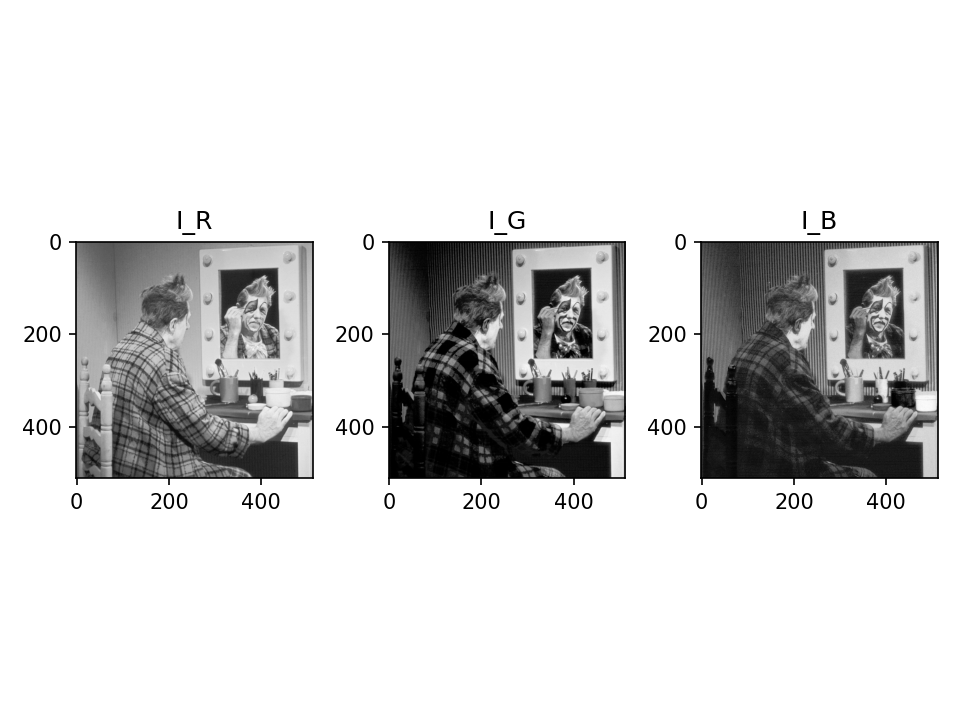

In [200]:
IR = I1[:,:,0]
IG = I1[:,:,1]
IB = I1[:,:,2]

plt.figure()

plt.subplot(1,3,1)
plt.imshow(IR)
plt.title("I_R")
plt.subplot(1,3,2)
plt.imshow(IG)
plt.title("I_G")
plt.subplot(1,3,3)
plt.imshow(IB)
plt.title("I_B")

plt.tight_layout()
plt.show()


* IR (Image du canal Rouge) : Représente l'intensité de la couleur rouge de chaque pixel.

* IG (Image du canal Vert) : Représente l'intensité de la couleur verte de chaque pixel.

* IB (Image du canal Bleu) : Représente l'intensité de la couleur bleue de chaque pixel.

3. Create a new image $I_3$ of dimensions 3, the first dimension contains the value of $I_R$, the second the value of $I_B$ and the third the values of $I_G$. Try another combinations. Remark: color images are better handled by `imshow()` if pixel values range in $[0,1]$.

<IPython.core.display.Javascript object>


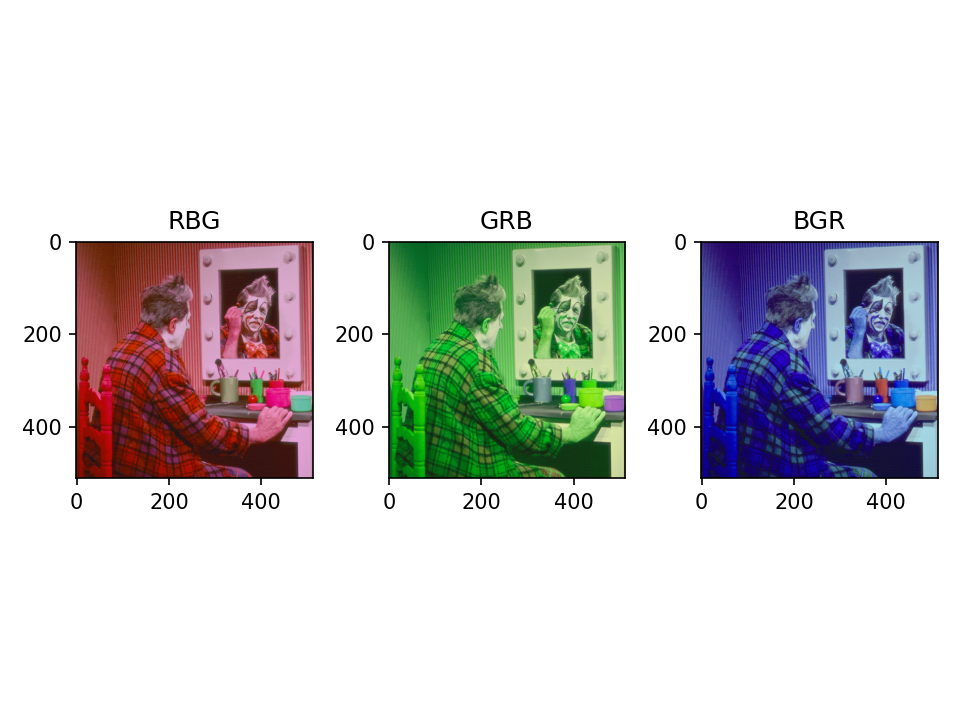

In [202]:
def invert_channels(img, C1, C2, C3):
    image = img.copy()
    image[:,:, 0] = C1
    image[:,:, 1] = C2
    image[:,:, 2] = C3
    return image

#Affichage de l'image

plt.figure()

plt.subplot(1,3,1)
plt.imshow(invert_channels(I1, IR, IB, IG))
plt.title("RBG")
plt.subplot(1,3,2)
plt.imshow(invert_channels(I1, IG, IR, IB))
plt.title("GRB")
plt.subplot(1,3,3)
plt.imshow(invert_channels(I1, IB, IG, IR))
plt.title("BGR")

plt.tight_layout()
plt.show()

4. Write a code that allows the see the first channel with red color scales, the second channel in green color scales, and the blue channel in blue color scales.

<IPython.core.display.Javascript object>


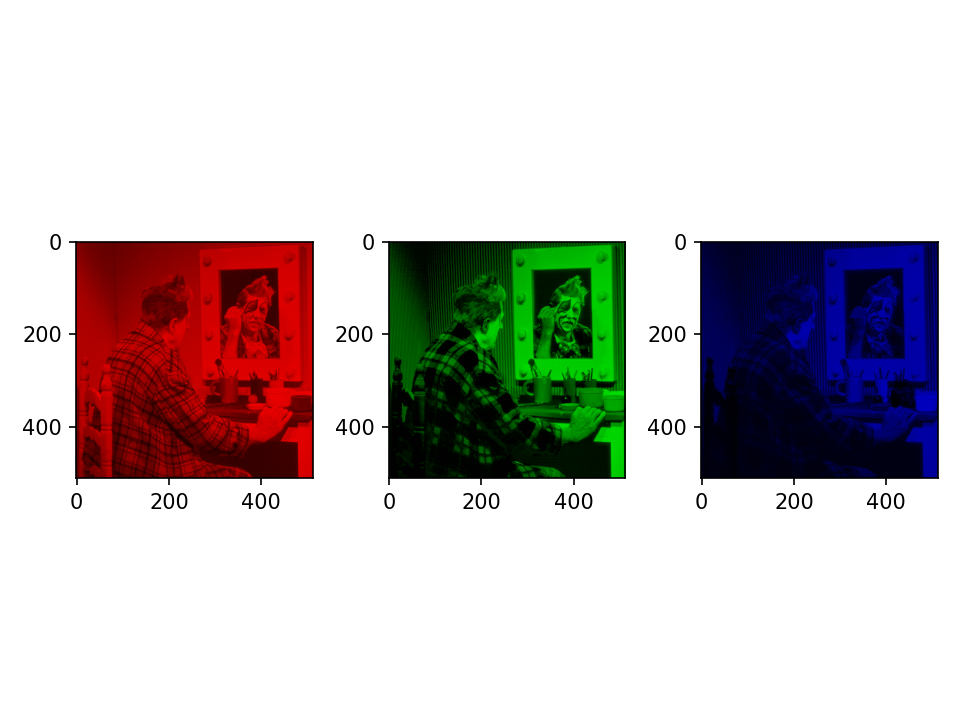

In [203]:
plt.figure()

for i in [0,1,2]:
    new_image = np.zeros_like(I1)
    new_image[:,:,i] = I1[:,:,i]
    plt.subplot(1,3,i+1)
    plt.imshow(new_image)
    
plt.tight_layout()
plt.show()